Copyright by Arjun Sarkar Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge https://www.leibniz-hki.de/en/applied-systems-biology.html HKI-Center for Systems Biology of Infection Leibniz Institute for Natural Product Research and Infection Biology - Hans Knöll Insitute (HKI) Adolf-Reichwein-Straße 23, 07745 Jena, Germany

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Label_Patches_Training.csv')
df

,video_num,filename,patch_name,infection,patient,class_label,image_path
0,1,246,246_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_0.tif
1,1,246,246_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_1.tif
2,1,246,246_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_0.tif
3,1,246,246_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_1.tif
4,1,94,094_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/094_0_0.tif
...,...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/250_1_1.tif
28076,35,227,227_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_0.tif
28077,35,227,227_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_1.tif
28078,35,227,227_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_1_0.tif


In [3]:
df['video_mid'] = df['patch_name'].str.extract('_(.*).tif')
df

,video_num,filename,patch_name,infection,patient,class_label,image_path,video_mid
0,1,246,246_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_0.tif,0_0
1,1,246,246_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_1.tif,0_1
2,1,246,246_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_0.tif,1_0
3,1,246,246_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_1.tif,1_1
4,1,94,094_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/094_0_0.tif,0_0
...,...,...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/250_1_1.tif,1_1
28076,35,227,227_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_0.tif,0_0
28077,35,227,227_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_1.tif,0_1
28078,35,227,227_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_1_0.tif,1_0


In [4]:
df = df.sort_values(['video_num','filename','video_mid'],ascending=[True,True,True])
df

,video_num,filename,patch_name,infection,patient,class_label,image_path,video_mid
800,1,1,001_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_0_0.tif,0_0
801,1,1,001_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_0_1.tif,0_1
802,1,1,001_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_1_0.tif,1_0
803,1,1,001_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_1_1.tif,1_1
124,1,2,002_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/002_0_0.tif,0_0
...,...,...,...,...,...,...,...,...
27255,35,259,259_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/259_1_1.tif,1_1
27784,35,260,260_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/260_0_0.tif,0_0
27785,35,260,260_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/260_0_1.tif,0_1
27786,35,260,260_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/260_1_0.tif,1_0


In [5]:
df.head(260)

,video_num,filename,patch_name,infection,patient,class_label,image_path,video_mid
800,1,1,001_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_0_0.tif,0_0
801,1,1,001_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_0_1.tif,0_1
802,1,1,001_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_1_0.tif,1_0
803,1,1,001_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/001_1_1.tif,1_1
124,1,2,002_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/002_0_0.tif,0_0
...,...,...,...,...,...,...,...,...
115,1,64,064_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/064_1_1.tif,1_1
220,1,65,065_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/065_0_0.tif,0_0
221,1,65,065_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/065_0_1.tif,0_1
222,1,65,065_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/065_1_0.tif,1_0


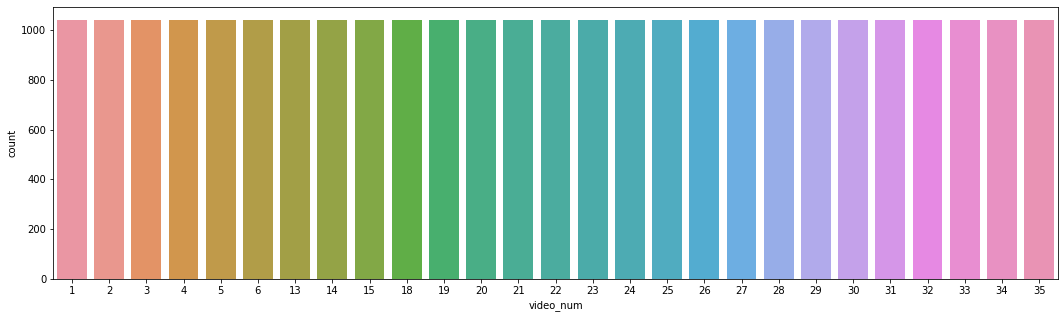

In [6]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'video_num', data = df)
plt.show()

In [7]:
input_path = '/asbdata/Arjun/Bloodi/Patches/'

In [8]:
grouped = df.groupby(df.video_num)
grouped.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [9]:
# create the required folders to save the videos

if not os.path.exists('/asbdata/Arjun/Bloodi/Patch_videos'):
    
    try:
        
        os.mkdir('/asbdata/Arjun/Bloodi/Patch_videos')
        output_path = '/asbdata/Arjun/Bloodi/Patch_videos/'
        
        for j in grouped.groups.keys():
    
            paths = os.path.join(output_path,str(j))
            os.mkdir(paths)
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Successfully created directory


In [10]:
num_frames = 40
frame_size = 1024
count = 0

for j in grouped.groups.keys():

    df_sequence = grouped.get_group(j)
    df_deeper = df_sequence.groupby(df_sequence.video_mid)
    
    for k in df_deeper.groups.keys():
        
        df_deeper_pd = df_deeper.get_group(k)
        image_folder = input_path + str(j) +'/'
        image_files = [image_folder + item[2] for i,item in df_deeper_pd.iterrows()]
    
        final_image_set = []
    
        for number in range(0,len(df_deeper_pd), 20):
        
            images = []
    
            for i, item in df_deeper_pd.iloc[number:number+num_frames].iterrows():
        
                image_files = image_folder + item[2]
            
                images.append(image_files) # list all the image names that will form the video
        
            if len(images) >= num_frames:
            
                final_image_set.append(images)
                
                
        for z in range(len(final_image_set)):
            
            # creating the video based on the extracted image names
        
            image_list = final_image_set[z]
            len_frames = len(image_list)
    
            frame = cv.imread(image_list[0])
            height, width, layers = frame.shape
        
            video_name = output_path+'/'+str(j)+'/'+ str(j)+'_'+str(count)+'.avi'
            
            count = count + 1
        
            if height == frame_size and width == frame_size and len_frames>=num_frames:
            
            # creates videos of size 1024*1024 with frame length=40
            
                video = cv.VideoWriter(video_name, 0,5, (width,height))
            
                for image in image_list:
                    video.write(cv.imread(image))
                
    print(f'Videos successfully created for video {j}')

Videos successfully created for video 1
Videos successfully created for video 2
Videos successfully created for video 3
Videos successfully created for video 4
Videos successfully created for video 5
Videos successfully created for video 6
Videos successfully created for video 13
Videos successfully created for video 14
Videos successfully created for video 15
Videos successfully created for video 18
Videos successfully created for video 19
Videos successfully created for video 20
Videos successfully created for video 21
Videos successfully created for video 22
Videos successfully created for video 23
Videos successfully created for video 24
Videos successfully created for video 25
Videos successfully created for video 26
Videos successfully created for video 27
Videos successfully created for video 28
Videos successfully created for video 29
Videos successfully created for video 30
Videos successfully created for video 31
Videos successfully created for video 32
Videos successfully cr

In [11]:
path = '/asbdata/Arjun/Bloodi/Patch_videos/'

for i in grouped.groups.keys():
    
    for file in sorted(os.listdir(path+'/'+str(i)+'/')):
        
        cap = cv.VideoCapture(path + str(i) + '/'+file)
        length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
        
        if length<num_frames:
            
            os.remove(path+ str(i)+'/'+file)
            print('removed file', file)

removed file 35_1295.avi
